# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Prantik Chatterjee 391350
    2. 
    3.

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [100]:
# Your code: 
import pandas as pd, numpy as np
import random
popden = pd.read_csv('population_density.csv')
random.seed(a=391350, version=2)
df=popden.sample(frac=0.9)
conditions = [
    (df['population_density'] >= 5824),
    (df['population_density'] < 5824) & (df['population_density'] >= 4368),
    (df['population_density'] < 4368) & (df['population_density'] >= 2912),
    (df['population_density'] < 2912) & (df['population_density'] >= 1456),
    (df['population_density'] < 1456)]
choices = ['very high','high','medium','low','very low']

df['population_density_categorical'] = np.select(conditions, choices, default='null')
df.to_csv(r'D:\RWTH\IDS\population_density_categorical.csv', index = None, header=True)

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

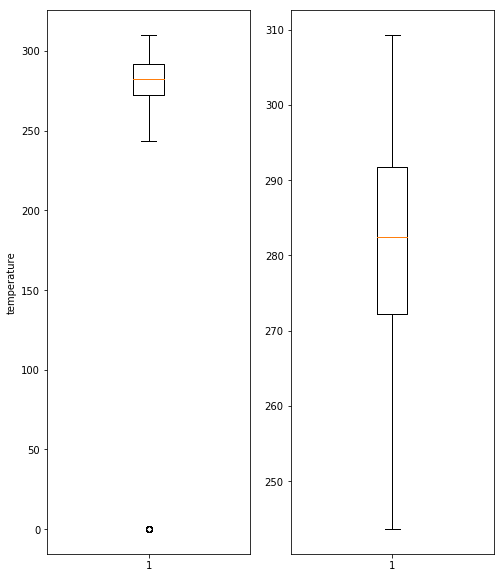

In [101]:
# Your code:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
Bp = plt.boxplot(df["temperature"])
plt.ylabel("temperature")
whiskers= [item.get_ydata() for item in Bp['whiskers']]
no_outliers=df[np.logical_and(df.temperature<whiskers[1][1],df.temperature>whiskers[0][1])]
plt.subplot(1,2,2)
Bp=plt.boxplot(no_outliers["temperature"])

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [102]:
# Your code:

print(f'mean_original: {df["temperature"].mean()}')
print(f'median_original: {df["temperature"].mean()}')
print(f'mode_original: {df["temperature"].mean()}')

print(f'mean_no_outliers: {no_outliers["temperature"].mean()}')
print(f'median_no_outliers: {no_outliers["temperature"].mean()}')
print(f'mode_no_outliers: {no_outliers["temperature"].mean()}')

mean_original: 281.173298197496
median_original: 281.173298197496
mode_original: 281.173298197496
mean_no_outliers: 281.2383313889183
median_no_outliers: 281.2383313889183
mode_no_outliers: 281.2383313889183


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [103]:
# Your code:
count_row1 = df.shape[0]
count_row2 = no_outliers.shape[0]
print("The no. of data rows of the original data file: ",count_row1)
print("The no. of data rows of the data file without outliers: ",count_row2)

The no. of data rows of the original data file:  43384
The no. of data rows of the data file without outliers:  43372


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

mean_non_none: 874.2631578947369
median_non_none: 874.2631578947369
1356.0
519.4


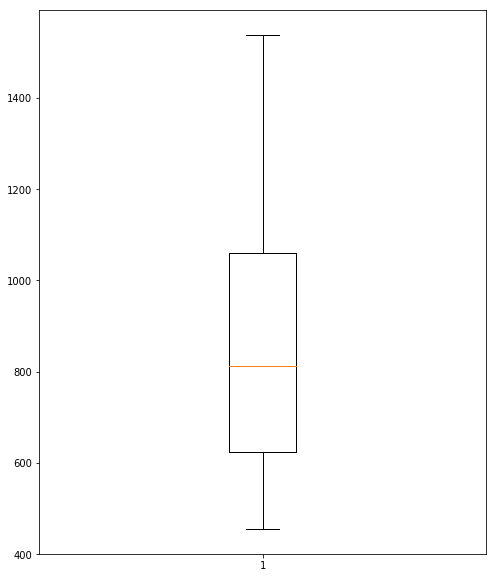

In [104]:
# Your code:
df_non_none = df[df["holiday"]!="None"]
newbp = plt.boxplot(df_non_none["population_density"])
print(f'mean_non_none: {df_non_none["population_density"].mean()}')
print(f'median_non_none: {df_non_none["population_density"].mean()}')
      
df_VeteransDay = df[df["holiday"]=="Veterans Day"]
VD = df_VeteransDay["population_density"].mean()
      
df_ThanksgivingDay = df[df["holiday"]=="Thanksgiving Day"]
TD = df_ThanksgivingDay["population_density"].mean()
      
df_MemorialDay = df[df["holiday"]=="Memorial Day"]
MD = df_MemorialDay["population_density"].mean()
      
df_LaborDay = df[df["holiday"]=="Labor Day"]
LD = df_LaborDay["population_density"].mean()
      
df_IndependenceDay = df[df["holiday"]=="Independence DayIndependence Day"]
ID = df_IndependenceDay["population_density"].mean()
      
df_MartinLutherKingJrDay = df[df["holiday"]=="Martin Luther King Jr Day"]
MLK = df_MartinLutherKingJrDay["population_density"].mean()
      
df_ColumbusDay = df[df["holiday"]=="Columbus Day"]
CD = df_ColumbusDay["population_density"].mean()
      
df_StateFair = df[df["holiday"]=="State Fair"]
SF = df_StateFair["population_density"].mean()
      
df_ChristmasDay = df[df["holiday"]=="Christmas Day"]
ChD = df_ChristmasDay["population_density"].mean()
      
df_NewYearsDay = df[df["holiday"]=="New Years Day"]
ND = df_NewYearsDay["population_density"].mean()
      
df_WashingtonsBirthday = df[df["holiday"]=="Washingtons Birthday"]
WD = df_WashingtonsBirthday["population_density"].mean()
      
      
print(max(VD, TD, MD, LD, ID, MLK, CD, SF, ChD, ND, WD))
print(min(VD, TD, MD, LD, ID, MLK, CD, SF, ChD, ND, WD))

   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

Text(0.5, 0, 'temperature')

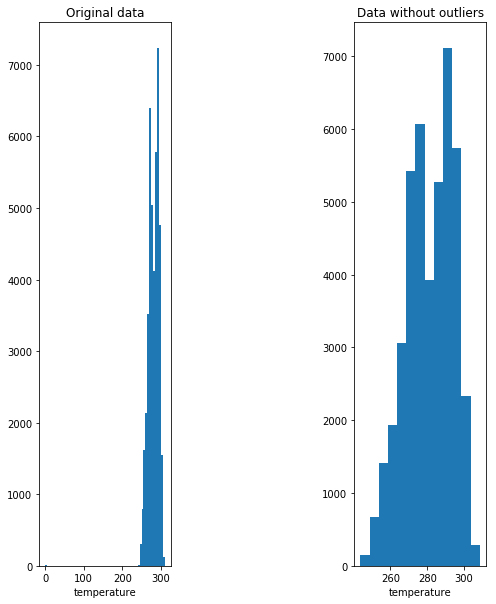

In [105]:
# Your code:
plt.subplot(1,3,1)
plt.hist(df["temperature"],bins=np.arange(min(df["temperature"]), max(df["temperature"]), 5))
plt.title("Original data")
plt.xlabel("temperature")

plt.subplot(1,3,3)
plt.hist(no_outliers["temperature"],bins=np.arange(min(no_outliers["temperature"]), max(no_outliers["temperature"]), 5))
plt.title("Data without outliers")
plt.xlabel("temperature")


   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

<IPython.core.display.Javascript object>


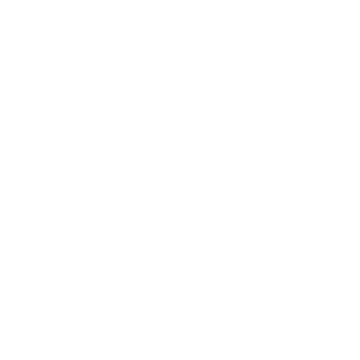

<IPython.core.display.Javascript object>


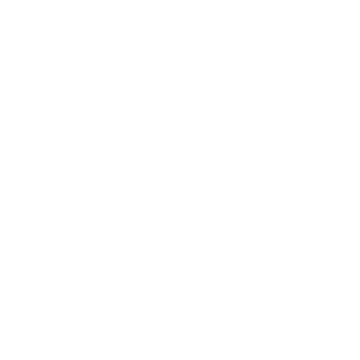

In [106]:
# Your code:
%matplotlib notebook
import seaborn as sns
sns.pairplot(df_non_none,vars=["temperature","population_density"])
# how to get the ranges , visually it is apparent though

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [126]:
# Your code:
conditions = [
    df["temperature"]>= np.percentile(df["temperature"],75),
    np.logical_and(df["temperature"] >=  np.percentile(df["temperature"],25), df["temperature"]< np.percentile(df["temperature"],75)), 
    df["temperature"]<= np.percentile(df["temperature"],25)
    ]
print("uq= {}".format(np.percentile(df["temperature"],75)))
print("lq= {}".format(np.percentile(df["temperature"],25)))
#print(df_non_none["temperature"].max())
#print(df_non_none["temperature"].min())

outputs = ['high', 'medium', 'low']

temperature_categorical = np.select(conditions,outputs,'None')
df["temperature_categorical"] = temperature_categorical
df.head()

uq= 291.79
lq= 272.15


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical,temperature_categorical
3188,None,256.12,0.0,0.0,20,Clouds,few clouds,05:00:00,462,very low,low
1122,None,288.12,0.0,0.0,87,Clear,sky is clear,23:00:00,2863,low,medium
34157,None,291.72,0.0,0.0,1,Clear,sky is clear,11:00:00,5043,high,medium
8677,None,302.60,0.0,0.0,0,Clear,Sky is Clear,21:00:00,2550,low,high
17618,None,292.98,0.0,0.0,1,Clear,sky is clear,01:00:00,961,very low,high


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [108]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree

data = df.drop(columns = ['temperature','rain_1h', 'snow_1h',
       'clouds_percentage','weather_type_details', 'date_time', 'population_density'])
data = data[["holiday","temperature_categorical","weather_type","population_density_categorical"]]


# Data preparation
columns = data.columns
descriptive_features = columns[:3]
label = columns[-1]
for column in columns:
    if column in descriptive_features or column in label:
        print(column)
        data[column]= data[column].astype(str)


#df_non_none.info()
data_descriptive = data[descriptive_features].values
data_label = data[label].values

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

#print(dot)

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

holiday
temperature_categorical
weather_type
population_density_categorical
You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
System entropy:  2.2304372702388027
System gini:  None


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: 




In [109]:
print("temperature_types: {}".format(df.temperature_categorical.unique())+"\n")
print("weather_types: {}".format(df.weather_type.unique())+"\n")
print("holiday_types: {}".format(df.holiday.unique())+"\n")

temperature_types: ['low' 'medium' 'high']

weather_types: ['Clouds' 'Clear' 'Mist' 'Thunderstorm' 'Snow' 'Rain' 'Drizzle' 'Haze'
 'Fog' 'Smoke' 'Squall']

holiday_types: ['None' 'State Fair' 'Memorial Day' 'Independence Day'
 'Martin Luther King Jr Day' 'Columbus Day' 'Christmas Day'
 'Thanksgiving Day' 'Washingtons Birthday' 'Labor Day' 'New Years Day'
 'Veterans Day']



## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [115]:
# Your code:

data = df.drop(columns = ['weather_type_details', 'population_density_categorical', 'temperature_categorical'])
df1 = data[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density']]


# Data preparation
columns = data.columns
descriptive_features = columns[1:6]
label = columns[-1]
for column in columns:
    if column in descriptive_features or column in label:
        print(column)
        data[column]= data[column].astype(str)


#df_non_none.info()
data_descriptive = data[descriptive_features].values
data_label = data[label].values

df1.head()

temperature
rain_1h
snow_1h
clouds_percentage
weather_type
population_density


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density
3188,None,256.12,0.0,0.0,20,05:00:00,462
1122,None,288.12,0.0,0.0,87,23:00:00,2863
34157,None,291.72,0.0,0.0,1,11:00:00,5043
8677,None,302.60,0.0,0.0,0,21:00:00,2550
17618,None,292.98,0.0,0.0,1,01:00:00,961


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

In [120]:
df1[df1.columns[1:]].corr()['population_density'][:]

temperature           0.130378
rain_1h               0.005016
snow_1h               0.000212
clouds_percentage     0.065954
population_density    1.000000
Name: population_density, dtype: float64

Explanation: Temperature has the highest correlation with our target feature population density. Hence this should be chosen as a input for linear regression. 


   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:


In [ ]:
# Your code:



(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

<IPython.core.display.Javascript object>


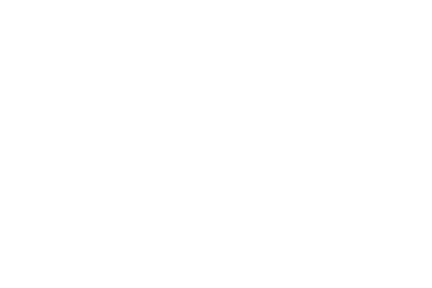

<IPython.core.display.Javascript object>


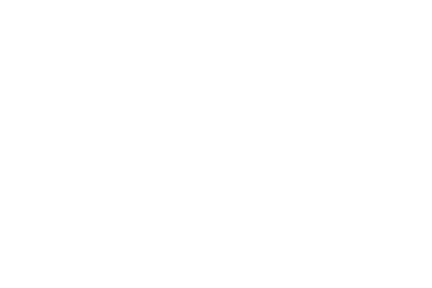

In [141]:
# Your code:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="population_density", y="date_time", data=df1)


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [ ]:
# Your code:



Explanation:


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [ ]:
# Your code:



(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

In [ ]:
# Your code:



   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [ ]:
# Your code:



   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [142]:
# Your code:

data = df.drop(columns = ['weather_type_details', 'population_density', 'temperature_categorical'])
df1 = data[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density_categorical']]


# Data preparation
columns = data.columns
descriptive_features = columns[1:6]
label = columns[-1]
for column in columns:
    if column in descriptive_features or column in label:
        print(column)
        data[column]= data[column].astype(str)


#df_non_none.info()
data_descriptive = data[descriptive_features].values
data_label = data[label].values

df1.head()


temperature
rain_1h
snow_1h
clouds_percentage
weather_type
population_density_categorical


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density_categorical
3188,None,256.12,0.0,0.0,20,05:00:00,very low
1122,None,288.12,0.0,0.0,87,23:00:00,low
34157,None,291.72,0.0,0.0,1,11:00:00,high
8677,None,302.60,0.0,0.0,0,21:00:00,low
17618,None,292.98,0.0,0.0,1,01:00:00,very low


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

Explanation:


   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [158]:
# Your code:



Explanation:


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [ ]:
# Your code:



   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [ ]:
# Your code:



   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [ ]:
# Your code:



Explanation:


   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:


In [ ]:
# Your code:



   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:


In [ ]:
# Your code:



   (d) Train your network with default hyperparameters and return the parameters.

In [ ]:
# Your code:



   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [ ]:
# Your code: (number of hidden layers)



In [ ]:
# Your code: (number of nodes in the hidden layer)



In [ ]:
# Your code: (optimized network) 



Explanation:


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [ ]:
# Your code: (linear activation function):



In [ ]:
# Your code: (non-linear activation function):



Explanation:


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the training data



- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the test data



- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [ ]:
# Your code for precision, recall and F1-scores on the test data



- Accuracy scores on training and test data (give explicitly the result for each fold)

In [ ]:
# Your code for accuracy scores on training and test data



In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
